# Plot for Summary Report: Calvings Per Month

In [1]:
%run 'helpers-for-report-plot-generation.ipynb'

In [2]:
def get_calvings():
    calvings = get_dataset('calvings').set_index('calving_date')['2016-01-01':'2017-12-31']
    return calvings

def get_calving_counts_by_month(calvings):
    calvings['count'] = 1

    print('Calves born in 2016: ', calvings['2016-01-01':'2016-12-31']['count'].sum())
    print('Calves born in 2017: ', calvings['2017-01-01':'2017-12-31']['count'].sum())

    calvings = calvings.resample('M').count()['count'].reset_index()
    calvings['formated_date'] = calvings['calving_date'].dt.strftime('%b %Y')
    print('Average Number of Calves Born Per Month: ', calvings['count'].mean())
    return calvings

calvings = get_calvings()
monthly_calving_counts = get_calving_counts_by_month(calvings)

Calves born in 2016:  203
Calves born in 2017:  199
Average Number of Calves Born Per Month:  16.75


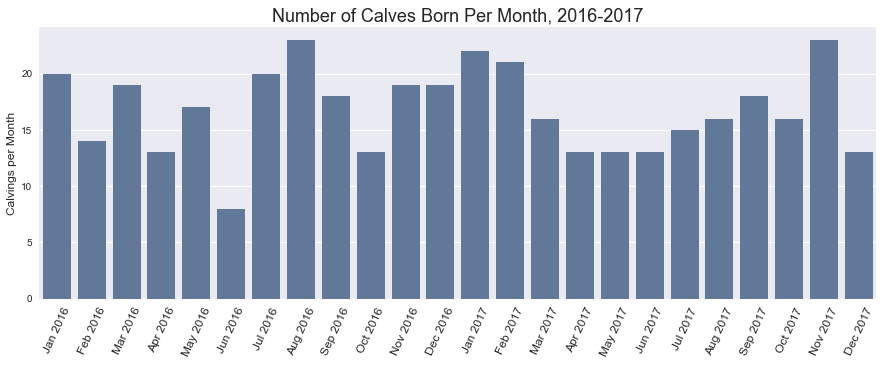

In [3]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = sns.barplot(ax=ax, x='formated_date', y='count', data=monthly_calving_counts, color="#5976A2")
_ = plt.ylabel('Calvings per Month', size=12)
_ = plt.xlabel('')
_ = plt.xticks(rotation='65', size=12)
_ = plt.title('Number of Calves Born Per Month, 2016-2017',size=18)
save_plot_for_summary_report('calvings-per-month.png')
plt.show()